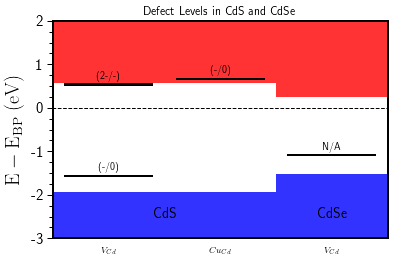

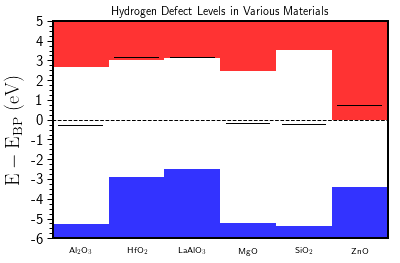

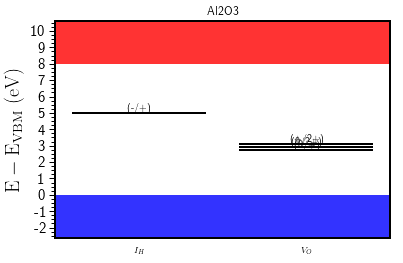

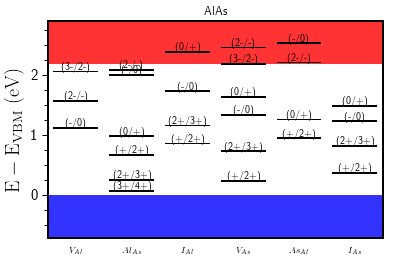

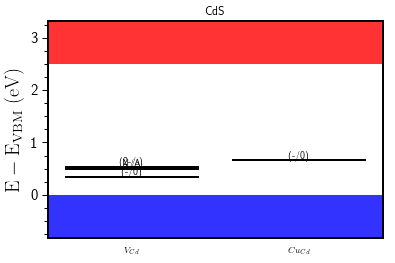

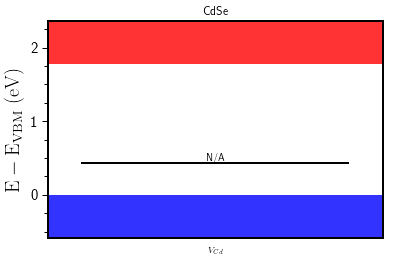

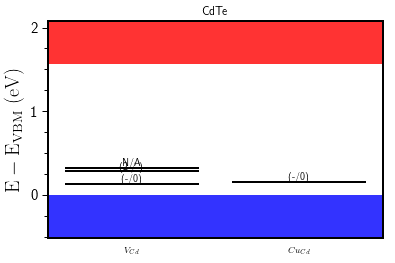

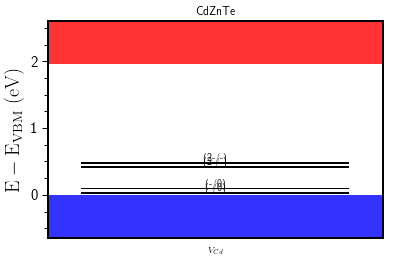

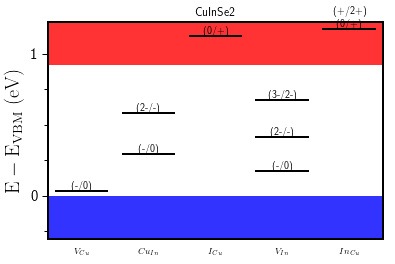

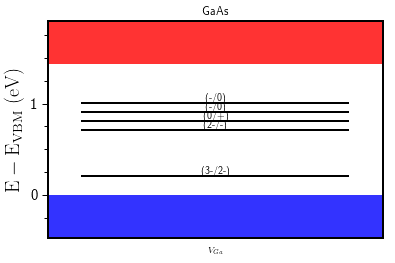

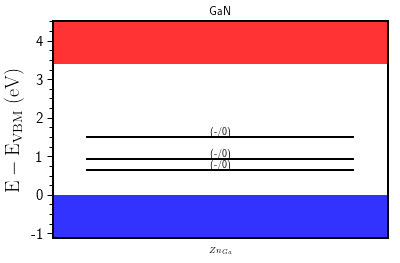

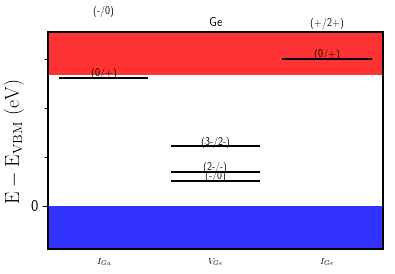

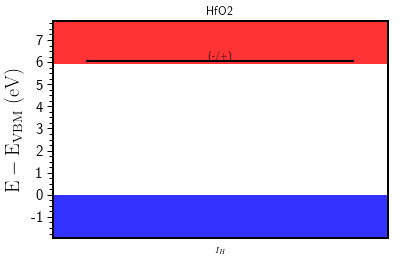

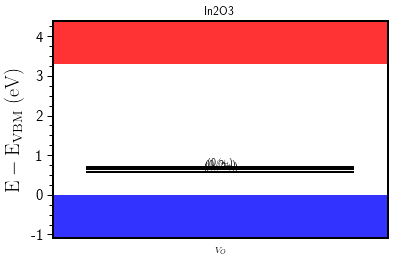

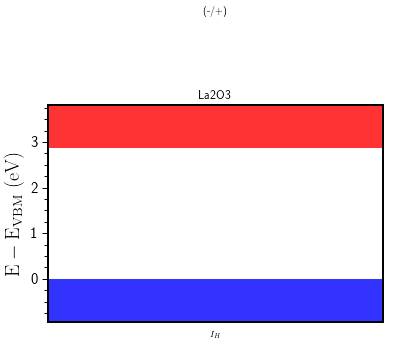

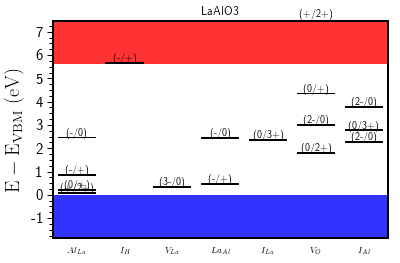

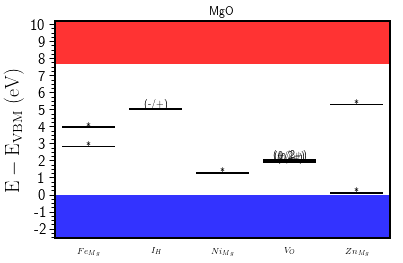

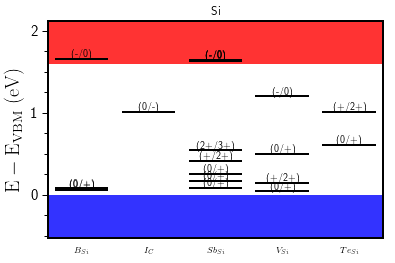

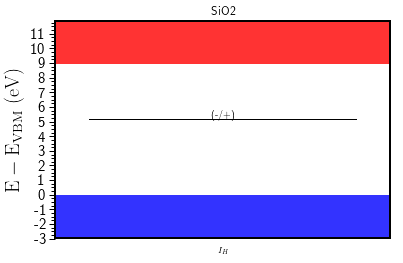

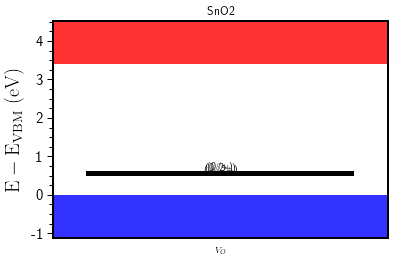

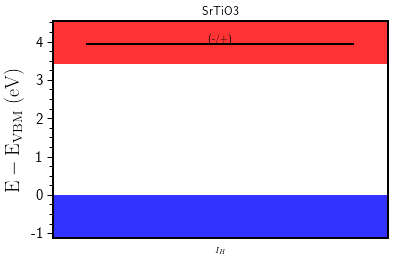

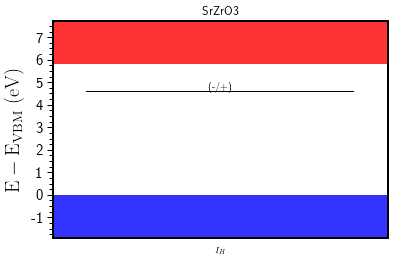

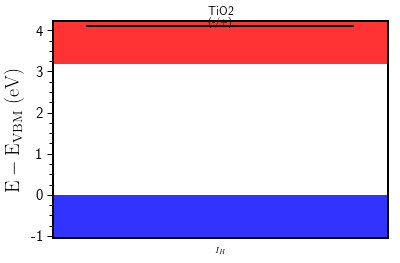

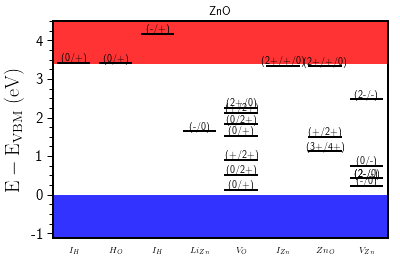

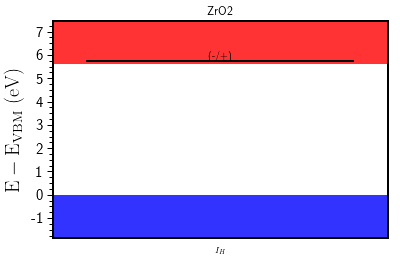

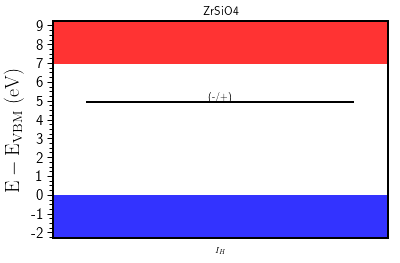

In [5]:
# Lots of this code was taken in chunks from Ethan Shapera
# @author = Sergi Castells

import math
import numpy as np
import matplotlib.pyplot as plt
import bisect
import itertools
import copy
import operator
from matplotlib.ticker import AutoMinorLocator
import matplotlib as mpl
import warnings
from collections import Counter
warnings.filterwarnings("ignore")
mpl.rcParams['axes.linewidth'] = 2.0

DefectData=np.genfromtxt('defects.txt',dtype=str,delimiter=',',skip_header=1) #len = 173
Host = []
TypeDefect = []
ChargeState = []
DefectMaterial = []
DefectLevel = []
MPID = []
Relative = []
for i in range(0,len(DefectData)):
    try:
        MPID.append(int(DefectData[i][1]))
        Host.append(DefectData[i][0])
        TypeDefect.append(DefectData[i][6])
        ChargeState.append(DefectData[i][4])
        DefectMaterial.append(DefectData[i][2])
        DefectLevel.append(float(DefectData[i][3]))
        Relative.append(DefectData[i][5])
    except:
        pass

def remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list 

IDsToPlot = remove(MPID)

MPData=np.genfromtxt('CNData_DensityEHullNAt_CompENeg_GapCorrCNL0.txt',dtype=None)
FilteredIDs=np.array([i[0] for i in MPData])
FilteredDataIndices=[np.where(FilteredIDs==a)[0] for a in IDsToPlot]
FilteredDataIndices=[item for sublist in FilteredDataIndices for item in sublist]

FullDataIndices=[np.where(FilteredIDs==a)[0] for a in IDsToPlot]
FullDataIndices=[x for sublist in FullDataIndices for x in sublist]

#Collect MPID,VBM,CBM,Formula
AllData=[[i,MPData[b][4],MPData[b][5],MPData[b][7]] for (i,b,c) in zip(IDsToPlot,FilteredDataIndices,FullDataIndices)]
MPVBM=[AllData[a][1] for a in range(0,len(AllData))]
MPCBM=[AllData[a][2] for a in range(0,len(AllData))]

formulasDict = {}
typesDefects = {}
defectMat = []
defectTypes = []
numPerHostArray = []
typePerHost = 1
numPerHost = 1
for i in range(0,len(Host)):
    if MPID[i] in FilteredIDs:
        if i < len(Host)-1:
            if Host[i] == Host[i+1] and TypeDefect[i] != TypeDefect[i+1]:
                typePerHost += 1
                defectMat.append(DefectMaterial[i])
                defectTypes.append(TypeDefect[i])
            if Host[i] != Host[i+1]:
                typesDefects[MPID[i]] = typePerHost
                formulasDict[MPID[i]] = Host[i]
                defectMat.append(DefectMaterial[i])
                defectTypes.append(TypeDefect[i])
                typePerHost = 1
            if Host[i] == Host[i+1]:
                numPerHost += 1
            if Host[i] != Host[i+1]:
                numPerHostArray.append(numPerHost)
                numPerHost = 1
        if i >= len(Host)-1:
            if Host[i] == Host[i-1] and TypeDefect[i] != TypeDefect[i-1]:
                typePerHost += 1
                defectMat.append(DefectMaterial[i])
                defectTypes.append(TypeDefect[i])
            if Host[i] != Host[i-1]:
                typesDefects[MPID[i]] = typePerHost
                formulasDict[MPID[i]] = Host[i]
                defectMat.append(DefectMaterial[i])
                defectTypes.append(TypeDefect[i])
                typePerHost = 1
            if Host[i] == Host[i-1]:
                numPerHost += 1
            if Host[i] != Host[i-1]:
                numPerHostArray.append(numPerHost)
                numPerHost = 1
    else:
        pass
        

numPerDefectArray = []
numPerDefect = 1
for i in range(0,len(Host)):
    if MPID[i] in FilteredIDs:
        if i < len(Host)-1:
            if Host[i] == Host[i+1] and TypeDefect[i] == TypeDefect[i+1] and DefectMaterial[i] == DefectMaterial[i+1]:
                numPerDefect += 1
            if Host[i] != Host[i+1] or TypeDefect[i] != TypeDefect[i+1]:
                numPerDefectArray.append(numPerDefect)
                numPerDefect = 1
        if i >= len(Host)-1:
            if Host[i] == Host[i-1] and TypeDefect[i] == TypeDefect[i-1] and DefectMaterial[i] == DefectMaterial[i-1]:
                 numPerDefect += 1
            if Host[i] != Host[i-1] or TypeDefect[i] != TypeDefect[i-1]:
                numPerDefectArray.append(numPerDefect)
                numPerDefect = 1

formulas = []
numDefects = []
for key in typesDefects:
    formulas.append(formulasDict[key])
    numDefects.append(typesDefects[key])

lowerVBM=[-1000]*len(AllData) #For bar plotting purposes
upperCBM=[1000]*len(AllData)
fixUpperLimit = [MPCBM[i] - MPVBM[i] for i in range(0,len(MPVBM))]

plt.rc('font', **{'family':'sans-serif','sans-serif':['Times New Roman']})
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20)


## CdS and CdSe
plt.figure(0)
plt.title('Defect Levels in CdS and CdSe')
x=np.arange(0,3,1)
x1=np.arange(0,2,1)
x2=np.arange(2,3,1)
xticks=[]
y=np.arange(-5,15,1)
yticks=np.arange(-5,15,1)
subxticks=['$V_{Cd}$','$Cu_{Cd}$','$V_{Cd}$']

#used Ethan's paper as source for Branch Point Energy
plt.bar(x1,-10,1.0,bottom=-1.93,color='b',alpha=0.8,align='center')
plt.bar(x1,10,1.0,bottom=-1.93+2.49,color='r',alpha=0.8,align='center')
plt.bar(x2,-10,1.0,bottom=-1.53,color='b',alpha=0.8,align='center')
plt.bar(x2,10,1.0,bottom=-1.53+1.7725,color='r',alpha=0.8,align='center')
plt.plot([-10,10],[0,0],'--k',linewidth=1.0)

plt.bar(0,0.05,0.8,bottom=0.330-1.93,color='k',align='center')
plt.text(0, 0.330-1.81, '(-/0)', ha='center', va='bottom')
plt.bar(0,0.05,0.8,bottom=0.510,color='k',align='center')
plt.text(0, 0.610, '(2-/-)', ha='center', va='bottom')
plt.bar(1,0.05,0.8,bottom=0.640,color='k',align='center')
plt.text(1, 0.730, '(-/0)', ha='center', va='bottom')
plt.bar(2,0.05,0.8,bottom=0.420-1.53,color='k',align='center')
plt.text(2, 0.420-1.45, 'N/A', ha='center', va='bottom')

plt.text(0.5, -2.6, 'CdS', ha='center', va='bottom',fontsize=14)
plt.text(2, -2.6, 'CdSe', ha='center', va='bottom',fontsize=14)

ml = AutoMinorLocator(4)
plt.tick_params(which='both', width=1)
plt.tick_params(which='major', length=6)
plt.tick_params(which='minor', length=4)
plt.xticks(x,subxticks)
plt.yticks(y,yticks)
plt.axis([-.5, len(subxticks)-.5, -3,2])
plt.ylabel(r'$\rm{E-E_\mathrm{BP}\ (eV)}$')
plt.tick_params(axis='both', which='major')
plt.axes().yaxis.set_minor_locator(ml)
plt.tick_params(axis='x',which='both',bottom=False)
##

##
plt.figure(1)
plt.title('Hydrogen Defect Levels in Various Materials')
x=np.arange(0,6,1)
xticks=[]
y=np.arange(-6,8,1)
yticks=np.arange(-6,15,1)
subxticks=['Al$_2$O$_3$','HfO$_2$','LaAlO$_3$','MgO','SiO$_2$','ZnO']

#used Ethan's paper as source for Branch Point Energy
#Al2O3
plt.bar(0,-10,1.0,bottom=-5.29,color='b',alpha=0.8,align='center')
plt.bar(0,10,1.0,bottom=-5.29+7.96,color='r',alpha=0.8,align='center')

#HfO2
plt.bar(1,-10,1.0,bottom=-2.88,color='b',alpha=0.8,align='center')
plt.bar(1,10,1.0,bottom=-2.88+5.9,color='r',alpha=0.8,align='center')

#LaAlO3
plt.bar(2,-10,1.0,bottom=-2.47,color='b',alpha=0.8,align='center')
plt.bar(2,10,1.0,bottom=-2.47+5.6,color='r',alpha=0.8,align='center')

#MgO
plt.bar(3,-10,1.0,bottom=-5.21,color='b',alpha=0.8,align='center')
plt.bar(3,10,1.0,bottom=-5.21+7.67,color='r',alpha=0.8,align='center')

#SiO2
plt.bar(4,-10,1.0,bottom=-5.36,color='b',alpha=0.8,align='center')
plt.bar(4,10,1.0,bottom=-5.36+8.9,color='r',alpha=0.8,align='center')

#ZnO
plt.bar(5,-10,1.0,bottom=-3.42,color='b',alpha=0.8,align='center')
plt.bar(5,10,1.0,bottom=-3.42+3.38,color='r',alpha=0.8,align='center')
#
#
plt.plot([-10,10],[0,0],'--k',linewidth=1.0)

plt.bar(0,0.05,0.8,bottom=4.953-5.29,color='k',align='center')
plt.bar(1,0.05,0.8,bottom=6.019-2.88,color='k',align='center')
plt.bar(2,0.05,0.8,bottom=5.611-2.47,color='k',align='center')
plt.bar(3,0.05,0.8,bottom=4.984-5.21,color='k',align='center')
plt.bar(4,0.05,0.8,bottom=5.078-5.36,color='k',align='center')
plt.bar(5,0.05,0.8,bottom=4.138-3.42,color='k',align='center')

ml = AutoMinorLocator(4)
plt.tick_params(which='both', width=1)
plt.tick_params(which='major', length=6)
plt.tick_params(which='minor', length=4)
plt.xticks(x,subxticks)
plt.yticks(y,yticks)
plt.axis([-.5, len(subxticks)-.5, -6,5])
plt.ylabel(r'$\rm{E-E_\mathrm{BP}\ (eV)}$')
plt.tick_params(axis='both', which='major')
plt.axes().yaxis.set_minor_locator(ml)
plt.tick_params(axis='x',which='both',bottom=False)
##


total = 0
totalDefects = 0
totalDefects2 = 0
for i in range(0,len(numDefects)):
    x=np.arange(numDefects[i])
    xticks=[]
    y=np.arange(-5,15,1)
    yticks=np.arange(-5,15,1)
    
    plt.figure(i+2)
    plt.title(formulas[i])
    plt.bar(x,lowerVBM[i],1.0,bottom=0,color='b',alpha=0.8,align='center')
    plt.bar(x,upperCBM[i],1.0,bottom=fixUpperLimit[i],color='r',alpha=0.8,align='center')
    
    defectFormatted = ""
    typeDefectSubStr = ""
    subxticks = []
    for j in range(0,numDefects[i]):
        if MPID[i] in IDsToPlot:
            if defectTypes[j+totalDefects] == "Interstitial":
                defectFormatted = "$I_{%s}$" % (defectMat[j+totalDefects])
            elif defectTypes[j+totalDefects] == "Vacancy":
                defectFormatted = "$V_{%s}$" % (defectMat[j+totalDefects])
            elif defectTypes[j+totalDefects][:4] == "Anti":
                typeDefectSubStr = defectTypes[j+totalDefects]
                defectFormatted = "$%s_{%s}$" % (defectMat[j+totalDefects],typeDefectSubStr[13:])
            elif defectTypes[j+totalDefects][:3] == "Sub":
                typeDefectSubStr = defectTypes[j+totalDefects]
                defectFormatted = "$%s_{%s}$" % (defectMat[j+totalDefects],typeDefectSubStr[16:])
            else:
                defectFormatted = "XX"
        subxticks.append(defectFormatted)
    totalDefects += numDefects[i]
    
    new_x = 0
    for j in range(0,numPerHostArray[i]):
        while(MPID[j+totalDefects2] not in FilteredIDs):
            totalDefects2 += 1
        #print(ChargeState[j+totalDefects2] + '\t' + Host[j+totalDefects2]) #IT WORKS!!
        if(Relative[j+totalDefects2] == 'Valence Band'):
            chargeDefect = plt.bar(new_x,fixUpperLimit[i]/70.0,0.8,bottom=DefectLevel[j+totalDefects2],color='k',align='center')
            plt.text(new_x, DefectLevel[j+totalDefects2], '%s' % ChargeState[j+totalDefects2], ha='center', va='bottom')
        if(Relative[j+totalDefects2] == 'Conduction Band'):
            chargeDefect = plt.bar(new_x,fixUpperLimit[i]/70.0,0.8,bottom=fixUpperLimit[i]-DefectLevel[j+totalDefects2],color='k',align='center')
            plt.text(new_x, fixUpperLimit[i]-DefectLevel[j+totalDefects2], '%s' % ChargeState[j+totalDefects2], ha='center', va='bottom')
        if(j+totalDefects2 < len(Host)-1):
            if(TypeDefect[j+totalDefects2] != TypeDefect[j+totalDefects2+1]):
                new_x += 1
        if(j+totalDefects2 >= len(Host)-1):
            if(TypeDefect[j+totalDefects2] != TypeDefect[j+totalDefects2-1]):
                new_x += 1
    totalDefects2 += numPerHostArray[i]
    
    ml = AutoMinorLocator(4)
    plt.tick_params(which='both', width=1)
    plt.tick_params(which='major', length=6)
    plt.tick_params(which='minor', length=4)
    plt.xticks(x,subxticks)
    plt.yticks(y,yticks)
    plt.axis([-.5, len(subxticks)-.5, -1*fixUpperLimit[i]/3,fixUpperLimit[i]+fixUpperLimit[i]/3])
    plt.ylabel(r'$\rm{E-E_\mathrm{VBM}\ (eV)}$')
    plt.tick_params(axis='both', which='major')
    plt.axes().yaxis.set_minor_locator(ml)
    plt.tick_params(axis='x',which='both',bottom=False)
    total += 1

#print(total) #get VBM and CBM for the other 5 materials not in the MPData txt
#print(len(numDefects))
#print(sum(numDefects))
plt.show()